# Solving the n-Queens Problem using Local Search

Student Name: Chris Hirschbrich

I have used the following AI tools: Github Copilot

I understand that my submission needs to be my own work: CH

## Instructions

Total Points: Undergrads 100 + 5 bonus / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file. 


## The n-Queens Problem

* __Goal:__ Find an arrangement of $n$ queens on a $n \times n$ chess board so that no queen is on the same row, column or diagonal as any other queen.

* __State space:__ An arrangement of the queens on the board. We restrict the state space to arrangements where there is only a single queen per column. We represent a state as an integer vector $\mathbf{q} = \{q_1, q_2, \dots, q_n\}$, each number representing the row positions of the queens from left to right. We will call a state a "board."

* __Objective function:__ The number of pairwise conflicts (i.e., two queens in the same row/column/diagonal).
The optimization problem is to find the optimal arrangement $\mathbf{q}^*$ of $n$ queens on the board can be written as:

  > minimize: $\mathrm{conflicts}(\mathbf{q})$
  >
  > subject to: $\mathbf{q} \ \text{contains only one queen per column}$

  Note: the constraint (subject to) is enforced by the definition of the state space.

* __Local improvement move:__ Move one queen to a different row in its column.

* __Termination:__ For this problem there is always an arrangement $\mathbf{q}^*$ with $\mathrm{conflicts}(\mathbf{q}^*) = 0$, however, the local improvement moves might end up in a local minimum. 

## Helper functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

np.random.seed(1234)


def random_board(n):
    """Creates a random board of size n x n. Note that only a single queen is placed in each column!"""
    
    return(np.random.randint(0,n, size = n))

def comb2(n): return n*(n-1)//2 # this is n choose 2 equivalent to math.comb(n, 2); // is int division

def conflicts(board):
    """Calculate the number of conflicts, i.e., the objective function."""

    n = len(board)
    
    horizontal_cnt = [0] * n
    diagonal1_cnt = [0] * 2 * n
    diagonal2_cnt = [0] * 2 * n
    
    for i in range(n):
        horizontal_cnt[board[i]] += 1
        diagonal1_cnt[i + board[i]] += 1
        diagonal2_cnt[i - board[i] + n] += 1
    
    return sum(map(comb2, horizontal_cnt + diagonal1_cnt + diagonal2_cnt))

# decrease the font size to fit larger boards
def show_board(board, cols = ['white', 'gray'], fontsize = 48):  
    """display the board"""
    
    n = len(board)
    
    # create chess board display
    display = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if (((i+j) % 2) != 0): 
                display[i,j] = 1
    
    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots()
    ax.imshow(display, cmap = cmap, 
              norm = colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])
    
    # place queens. Note: Unicode u265B is a black queen
    for j in range(n):
        plt.text(j, board[j], u"\u265B", fontsize = fontsize, 
                 horizontalalignment = 'center',
                 verticalalignment = 'center')
    
    print(f"Board with {conflicts(board)} conflicts.")
    plt.show()

## Create a board

Board with 4 conflicts.


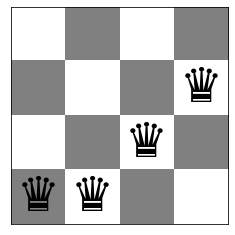

Queens (left to right) are at rows: [3 3 2 1]
Number of conflicts: 4


In [2]:
board = random_board(4)

show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

A board $4 \times 4$ with no conflicts:

Board with 0 conflicts.


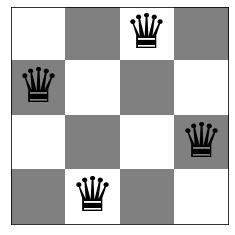

In [3]:
board = [1,3,0,2]
show_board(board)

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision. 
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formatted professionally. 
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.

## Task 1: Steepest-ascend Hill Climbing Search [30 Points]

Calculate the objective function for all local moves (see definition of local moves above) and always choose the best among all local moves. If there are no local moves that improve the objective, then you have reached a local optimum. 

In [4]:
# Steepest-Ascent Hill Climbing
def SAHC(board):
    best_board = board
    best_conflicts = conflicts(board)
    n = len(board)
    while True:
        neighbors = []
        for col in range(n):
            for row in range(n):
                if row != best_board[col]:
                    neighbor = best_board.copy()
                    neighbor[col] = row
                    neighbors.append(neighbor)
        
        # Evaluate all neighbors
        neighbor_conflicts = [conflicts(neighbor) for neighbor in neighbors]
        
        # Find the best neighbor
        min_conflicts = min(neighbor_conflicts)
        if min_conflicts >= best_conflicts:
            # No better neighbors, local optimum reached
            break
        
        # Update to the best neighbor
        best_board = neighbors[neighbor_conflicts.index(min_conflicts)]
        best_conflicts = min_conflicts
        
    return best_board

    
    

Board with 0 conflicts.


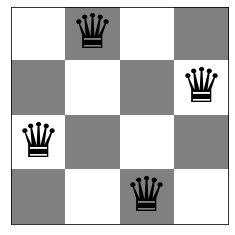

reached global optimum: % 39.82


In [5]:
# Code and description go here
count = 0
y = 10000
for n in range(y):
    board = random_board(4)
    if conflicts(SAHC(board)) == 0:
        count += 1
board = random_board(4)
show_board(SAHC(board))
print("reached global optimum: %", count/y * 100)

## Task 2: Stochastic Hill Climbing 1 [10 Points]

Chooses randomly from among all uphill moves till you have reached a local optimum.

In [6]:
def stochastic_hill_climbing(board):
    n = len(board)
    current_board = board.copy()
    current_conflicts = conflicts(current_board)
    
    while True:
        neighbors = []
        for col in range(n):
            for row in range(n):
                if row != current_board[col]:
                    neighbor = current_board.copy()
                    neighbor[col] = row
                    neighbors.append(neighbor)
        
        # Evaluate all neighbors
        neighbor_conflicts = [conflicts(neighbor) for neighbor in neighbors]
        
        # Find all neighbors with fewer conflicts than the current board
        better_neighbors = [neighbors[i] for i in range(len(neighbors)) if neighbor_conflicts[i] < current_conflicts]
        
        if not better_neighbors:
            # No better neighbors, local optimum reached
            break
        
        # Randomly choose one of the better neighbors
        current_board = better_neighbors[np.random.randint(len(better_neighbors))]
        current_conflicts = conflicts(current_board)
    
    return current_board




Board with 1 conflicts.


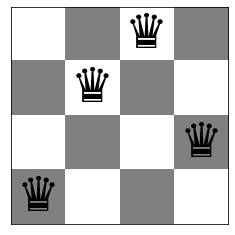

reached global optimum: % 33.98


In [7]:
# Code and description go here
count = 0
y = 10000
for n in range(y):
    board = random_board(4)
    if conflicts(stochastic_hill_climbing(board)) == 0:
        count += 1
board = random_board(4)
show_board(stochastic_hill_climbing(board))
print("reached global optimum: %", count/y * 100)

## Task 3: Stochastic Hill Climbing 2 [20 Points]

A popular version of stochastic hill climbing generates only a single random local neighbor at a time and accept it if it has a better objective function value than the current state. This is very efficient if each state has many possible successor states. This method is called "First-choice hill climbing" in the textbook.

__Notes:__ 

* Detecting local optima is tricky! You can, for example, stop if you were not able to improve the objective function during the last $x$ tries.

In [8]:
def first_choice_hill_climbing(board):
    n = len(board)
    current_board = board.copy()
    current_conflicts = conflicts(current_board)
    
    while True:
        found_better = False
        for _ in range(n * n):  # Limit the number of attempts to find a better neighbor
            col = np.random.randint(0, n - 1)
            row = np.random.randint(0, n - 1)
            if row != current_board[col]:
                neighbor = current_board.copy()
                neighbor[col] = row
                neighbor_conflicts = conflicts(neighbor)
                
                if neighbor_conflicts < current_conflicts:
                    current_board = neighbor
                    current_conflicts = neighbor_conflicts
                    found_better = True
                    break
        
        if not found_better:
            # No better neighbor found, local optimum reached
            break
    
    return current_board
    

Board with 2 conflicts.


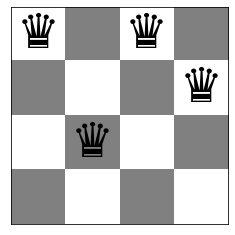

709 7.090000000000001


In [9]:
# Code and description go here
count = 0
y = 10000
for n in range(y):
    board = random_board(4)
    if conflicts(first_choice_hill_climbing(board)) == 0:
        count += 1
board = random_board(4)
show_board(first_choice_hill_climbing(board))
print(count, count/y * 100)

## Task 4: Hill Climbing Search with Random Restarts [10 Points]

Hill climbing will often end up in local optima. Restart the each of the three hill climbing algorithm up to 100 times with a random board to find a better (hopefully optimal) solution. Note that restart just means to run the algorithm several times starting with a new random board.

In [29]:
# Code and description go here
import timeit

def random_restarts(x):
    print("Steepest-Ascend Hill Climbing")
    num_conflicts = 0
    opt_solution = 0
    avg_runtime = 0
    best_board = random_board(x)
    for n in range(100):
        start = timeit.default_timer()
        board = random_board(x)
        board = SAHC(board)  # Capture the result of SAHC
        if conflicts(board) < conflicts(best_board):
            best_board = board
        if conflicts(board) == 0:
            opt_solution += 1
        num_conflicts += conflicts(board)
        stop = timeit.default_timer()
        avg_runtime += stop - start
    avg_runtime /= 100

    

    print ("Average Run-Time: ", avg_runtime)
    print("Average number of conflicts: ", num_conflicts / 100)
    print("% of runs ending in optimal solution", opt_solution)
    print("-------------------------")


    print("Stochastic Hill Climbing")
    num_conflicts = 0
    opt_solution = 0
    avg_runtime = 0
    best_board = random_board(x)
    for n in range(100):
        start = timeit.default_timer()
        board = random_board(x)
        board = stochastic_hill_climbing(board)  # Capture the result of SAHC
        if conflicts(board) < conflicts(best_board):
            best_board = board
        if conflicts(board) == 0:
            opt_solution += 1
        num_conflicts += conflicts(board)
        stop = timeit.default_timer()
        avg_runtime += stop - start
    avg_runtime /= 100

    

    print ("Average Run-Time: ", avg_runtime)
    print("Average number of conflicts: ", num_conflicts / 100)
    print("% of runs ending in optimal solution", opt_solution)
    print("-------------------------")


    print("First Choice Hill Climbing")
    num_conflicts = 0
    opt_solution = 0
    avg_runtime = 0
    best_board = random_board(x)
    for n in range(100):
        start = timeit.default_timer()
        board = random_board(x)
        board = first_choice_hill_climbing(board)  # Capture the result of SAHC
        if conflicts(board) < conflicts(best_board):
            best_board = board
        if conflicts(board) == 0:
            opt_solution += 1
        num_conflicts += conflicts(board)
        stop = timeit.default_timer()
        avg_runtime += stop - start
    avg_runtime /= 100

    

    print ("Average Run-Time: ", avg_runtime)
    print("Average number of conflicts: ", num_conflicts / 100)
    print("% of runs ending in optimal solution", opt_solution)
    print("-------------------------")

    

In [30]:
random_restarts(4)
random_restarts(8)

Steepest-Ascend Hill Climbing
Average Run-Time:  0.00013938555985077984
Average number of conflicts:  0.58
% of runs ending in optimal solution 45
-------------------------
Stochastic Hill Climbing
Average Run-Time:  0.00015413495973916723
Average number of conflicts:  0.83
% of runs ending in optimal solution 32
-------------------------
First Choice Hill Climbing
Average Run-Time:  0.00031180649999441813
Average number of conflicts:  1.6
% of runs ending in optimal solution 13
-------------------------
Steepest-Ascend Hill Climbing
Average Run-Time:  0.0013616137100325432
Average number of conflicts:  1.23
% of runs ending in optimal solution 19
-------------------------
Stochastic Hill Climbing
Average Run-Time:  0.0020848499500789332
Average number of conflicts:  1.34
% of runs ending in optimal solution 12
-------------------------
First Choice Hill Climbing
Average Run-Time:  0.0007870123903921922
Average number of conflicts:  1.93
% of runs ending in optimal solution 3
---------

## Task 5: Simulated Annealing [10 Points]

Simulated annealing is a form of stochastic hill climbing that avoid local optima by also allowing downhill moves with a probability proportional to a temperature. The temperature is decreased in every iteration following an annealing schedule. You have to experiment with the annealing schedule (Google to find guidance on this).


1. Implement simulated annealing for the n-Queens problem.
2. Compare the performance with the previous algorithms. 
3. Discuss your choice of annealing schedule.

In [21]:
def simulated_annealing(board):
    n = len(board)
    current_board = board.copy()
    current_conflicts = conflicts(current_board)
    temperature = 100  # Initial temperature
    
    while temperature > 0.01:  # Stop when temperature is very low
            neighbors = []
            for col in range(n):
                for row in range(n):
                    if row != current_board[col]:
                        neighbor = current_board.copy()
                        neighbor[col] = row
                        neighbors.append(neighbor)
            
            # Evaluate all neighbors
            neighbor_conflicts = [conflicts(neighbor) for neighbor in neighbors]
            
            # Select a random neighbor
            random_index = np.random.randint(len(neighbors))
            neighbor = neighbors[random_index]
            neighbor_conflicts_value = neighbor_conflicts[random_index]
            
            # Calculate the difference in conflicts
            delta_e = neighbor_conflicts_value - current_conflicts
            
            # Decide to accept this neighbor
            if delta_e < 0 or np.random.rand() < np.exp(-delta_e / temperature):
                current_board = neighbor
                current_conflicts = neighbor_conflicts_value
            
            # Gradually reduce the temperature
            temperature *= 0.99  # Exponential cooling
        
    return current_board

#### Annealing Schedule: Exponential Cooling
The annealing schedule I selected for my implementation employs exponential cooling with a decay rate of 0.99. This allows the temperature to decrease steadily over time, balancing the need for exploration at higher temperatures with eventual convergence as the temperature drops. At the start, when the temperature is high, the algorithm permits moves to solutions with higher conflict counts which accepts worse solutions. This acceptance probability aids the search in exploring diverse areas of the solution space and helps avoid local optima. As the temperature gradually reduces, the likelihood of accepting worse moves decreases, encouraging the algorithm to focus more closely on improving moves, thus aiding convergence.

#### Initial Temperature Setting
The initial temperature was set to 100, which allows the algorithm to explore a wide range of solutions early in the search. At higher temperatures, simulated annealing can accept a greater number of downhill moves, enhancing its ability to escape from local optima. If the initial temperature is set too low, the algorithm would closely resemble the hill climbing used earlier, quickly converging and potentially becoming trapped in suboptimal regions of the solution space. For larger instances of the n-Queens problem where n is much larger, an even higher initial temperature—such as 500 or 1000—might be appropriate, particularly if the initial configurations contain many conflicts. Higher starting temperatures provide a broader exploration phase, which is beneficial when initial conflict counts are high, ensuring the algorithm has sufficient flexibility to escape complex local optima.

In [31]:
def sim_restarts(x):
    print("Simulated Annealing")
    num_conflicts = 0
    opt_solution = 0
    avg_runtime = 0
    best_board = random_board(x)
    for n in range(100):
        start = timeit.default_timer()
        board = random_board(x)
        board = simulated_annealing(board)  # Capture the result of SAHC
        if conflicts(board) < conflicts(best_board):
            best_board = board
        if conflicts(board) == 0:
            opt_solution += 1
        num_conflicts += conflicts(board)
        stop = timeit.default_timer()
        avg_runtime += stop - start
    avg_runtime /= 100

    

    print ("Average Run-Time: ", avg_runtime)
    print("Average number of conflicts: ", num_conflicts / 100)
    print("% of runs ending in optimal solution", opt_solution)
    print("-------------------------")



In [32]:
sim_restarts(4)
sim_restarts(8)


Simulated Annealing
Average Run-Time:  0.03950651431001461
Average number of conflicts:  0.0
% of runs ending in optimal solution 100
-------------------------
Simulated Annealing
Average Run-Time:  0.29328166298000724
Average number of conflicts:  0.53
% of runs ending in optimal solution 47
-------------------------


## Task 6: Compare Performance [10 Points]

Compare the algorithm using runtime and objective function values. Use boards of size 4 and 8 to explore how the different algorithms perform. Make sure that you run the algorithms for each board size several times (at least 100 times) with different starting boards and report averages.

Complete the following table

| Algorithm           | Board size | Avg. Run time | Avg. number of conflicts | % of runs ending in optimal solution  |
| ------------------- | ---------- | ------------- | --------------------------------- | - |
| Steepest asc. HC    |     4      |    0.0001           |   0.58                                | 45   |
| Stochastic HC 1     |     4      |    0.0002           |   0.83                                | 32   |
| Stochastic HC 2     |     4      |    0.0003           |   1.60                                | 13   |
| Simulated Annealing |     4      |    0.0395           |   0.00                                | 100  |
| Steepest asc. HC    |     8      |    0.0013           |   1.23                                | 19  |
| Stochastic HC 1     |     8      |    0.0020           |   1.34                                | 12  |
| Stochastic HC 2     |     8      |    0.0007           |   1.93                                | 3  |
| Simulated Annealing |     8      |    0.2932           |   0.53                                | 47  |
| Steepest asc. HC    |     12     |    0.0064           |   1.65                                | 8   |
| Stochastic HC 1     |     12     |    0.0002           |   1.83                                | 8   |
| Stochastic HC 2     |     12     |    0.0030           |   2.77                                | 2   |
| Simulated Annealing |     12     |    0.9527           |   1.11                                | 15  |
| Steepest asc. HC    |     16     |    0.0186           |   2.04                                | 1  |
| Stochastic HC 1     |     16     |    0.0293           |   2.25                                | 5  |
| Stochastic HC 2     |     16     |    0.0063           |   2.85                                | 0  |
| Simulated Annealing |     16     |    2.2603           |   1.81                                | 3  |



Add the used code and the answer to the following questions below.

* How do the algorithms scale with problem size? You will need to run more board sizes. You can add the results to the table above and show the result as a chart.

* What is the largest board each algorithm can solve in a reasonable amount time?

Hint: See [Profiling Python Code](../HOWTOs/profiling_code.ipynb) for help about how to measure runtime in Python.

In [35]:
# Code, results, charts and discussion go here
random_restarts(12)
sim_restarts(12)

Steepest-Ascend Hill Climbing
Average Run-Time:  0.006425792150148482
Average number of conflicts:  1.65
% of runs ending in optimal solution 8
-------------------------
Stochastic Hill Climbing
Average Run-Time:  0.01019448940991424
Average number of conflicts:  1.83
% of runs ending in optimal solution 8
-------------------------
First Choice Hill Climbing
Average Run-Time:  0.00301429299001029
Average number of conflicts:  2.77
% of runs ending in optimal solution 2
-------------------------
Simulated Annealing
Average Run-Time:  0.9527455614801147
Average number of conflicts:  1.11
% of runs ending in optimal solution 15
-------------------------


In [36]:
random_restarts(16)
sim_restarts(16)

Steepest-Ascend Hill Climbing
Average Run-Time:  0.018662152709985093
Average number of conflicts:  2.04
% of runs ending in optimal solution 1
-------------------------
Stochastic Hill Climbing
Average Run-Time:  0.02938883785991493
Average number of conflicts:  2.25
% of runs ending in optimal solution 5
-------------------------
First Choice Hill Climbing
Average Run-Time:  0.006360302280045289
Average number of conflicts:  2.85
% of runs ending in optimal solution 0
-------------------------
Simulated Annealing
Average Run-Time:  2.2603350733799017
Average number of conflicts:  1.81
% of runs ending in optimal solution 3
-------------------------


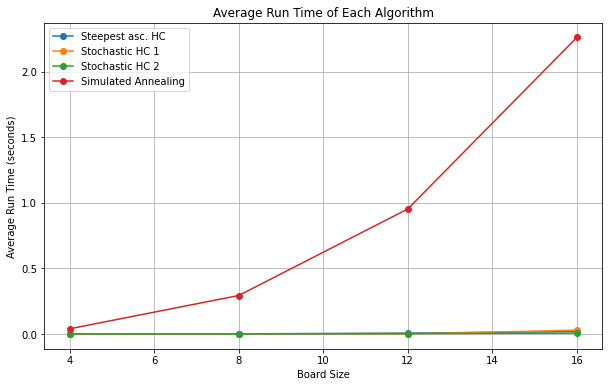

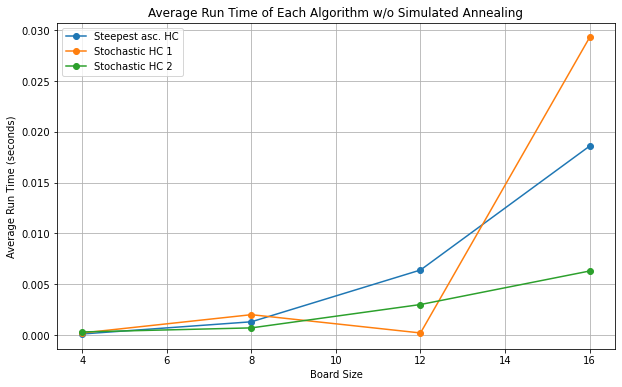

In [44]:
import matplotlib.pyplot as plt
# Data for plotting
algorithms = ['Steepest asc. HC', 'Stochastic HC 1', 'Stochastic HC 2', 'Simulated Annealing']
board_sizes = [4, 8, 12, 16]
avg_run_times = [
    [0.0001, 0.0013, 0.0064, 0.0186],  # Steepest asc. HC
    [0.0002, 0.0020, 0.0002, 0.0293],  # Stochastic HC 1
    [0.0003, 0.0007, 0.0030, 0.0063],  # Stochastic HC 2
    [0.0395, 0.2932, 0.9527, 2.2603]   # Simulated Annealing
]

# Plotting
plt.figure(figsize=(10, 6))
for i, algorithm in enumerate(algorithms):
    plt.plot(board_sizes, avg_run_times[i], marker='o', label=algorithm)

plt.xlabel('Board Size')
plt.ylabel('Average Run Time (seconds)')
plt.title('Average Run Time of Each Algorithm')
plt.legend()
plt.grid(True)
plt.show()

# graph without simulated annealing because it grows much faster than the other algorithms
algorithms = ['Steepest asc. HC', 'Stochastic HC 1', 'Stochastic HC 2']
board_sizes = [4, 8, 12, 16]
avg_run_times = [
    [0.0001, 0.0013, 0.0064, 0.0186],  # Steepest asc. HC
    [0.0002, 0.0020, 0.0002, 0.0293],  # Stochastic HC 1
    [0.0003, 0.0007, 0.0030, 0.0063]  # Stochastic HC 2 
]

# Plotting
plt.figure(figsize=(10, 6))
for i, algorithm in enumerate(algorithms):
    plt.plot(board_sizes, avg_run_times[i], marker='o', label=algorithm)

plt.xlabel('Board Size')
plt.ylabel('Average Run Time (seconds)')
plt.title('Average Run Time of Each Algorithm w/o Simulated Annealing')
plt.legend()
plt.grid(True)
plt.show()

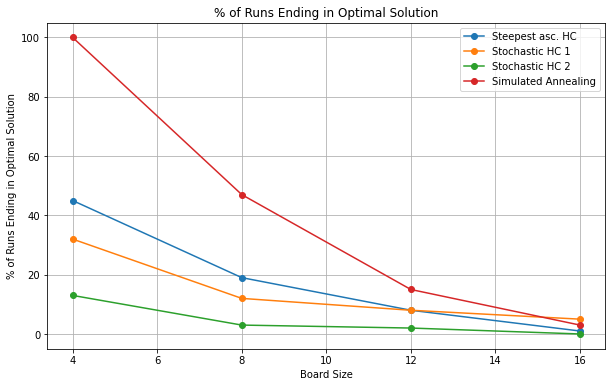

In [47]:
# Data for plotting
optimal_solutions = [
    [45, 19, 8, 1],  # Steepest asc. HC
    [32, 12, 8, 5],  # Stochastic HC 1
    [13, 3, 2, 0],   # Stochastic HC 2
    [100, 47, 15, 3] # Simulated Annealing
]

# Plotting
algorithms = ['Steepest asc. HC', 'Stochastic HC 1', 'Stochastic HC 2', 'Simulated Annealing']
plt.figure(figsize=(10, 6))
for i, algorithm in enumerate(algorithms):
    plt.plot(board_sizes, optimal_solutions[i], marker='o', label=algorithm)

plt.xlabel('Board Size')
plt.ylabel('% of Runs Ending in Optimal Solution')
plt.title('% of Runs Ending in Optimal Solution')
plt.legend()
plt.grid(True)
plt.show()

## Advanced task: Exploring other Local Moves

* __Graduate students__ need to complete this task [10 points]
* __Undergraduate students__ can attempt this as a bonus task [max +5 bonus points].

Implement a few different local moves. Implement:

* moving one queen only one square at a time
* switching two columns
* move two queens at a time 

Compare the performance of these moves for the 8-Queens problem using your stochastic hill climbing 2 implementation from above. Also consider mixing the use of several types of local moves (e.g., move one queen and moving two queens).

Describe what you find out about how well these moves and combinations of these moves work.

In [16]:
# Code and description go here

## More things to do

Implement a Genetic Algorithm for the n-Queens problem.

In [17]:
# Code and description go here